In [1]:
import numpy as np
import torch

data1  = np.load('/nfs-04/yuyue/visualtts_datasets/chem/chem_for_espnet/preprocessed_data/lip_feature/chem_00_ZwsWjelzqDA-062.npy')
data1 = torch.from_numpy(data1).float()

length = 250
data1 = torch.nn.functional.pad(data1, (0, 0, 0, length - data1.shape[0]), mode='constant', value=0)
data1.shape # [avhubert_len, 1024 (avhubert_dim)]

torch.Size([250, 1024])

In [2]:
data2 = np.load('/home/chengxin/chengxin/Dataset_Sound/Chem/preprocessed_data/duration_matrix_25/chem_00_ZwsWjelzqDA-062.npy')
data2 = torch.from_numpy(data2).float()

pad_seq_length = 120
data2 = torch.nn.functional.pad(data2, (0, pad_seq_length - data2.shape[-1]), mode='constant', value=0)
data2.shape   # [250 (avhubert_len pad to latent_len), phone_seq_len]

torch.Size([250, 120])

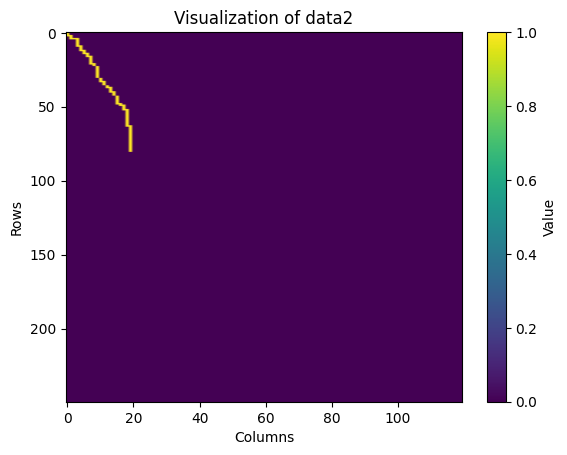

In [3]:
import matplotlib.pyplot as plt

plt.imshow(data2, aspect='auto', cmap='viridis')
plt.colorbar(label='Value')
plt.title('Visualization of data2')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [4]:
import csv
from tqdm import tqdm

results = []
with open('/home/chengxin/chengxin/Dataset_Sound/MetaData/vaflow2_meta/meta/train_25_gtref_Chem_LRS2_GRID.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    for row in tqdm(reader):
        wav_file, video_clip, spk_ebd, duration_matrix_path, phone_id_seq, phone_seq = row
        name = wav_file.split('/')[-1].split('.')[0]

        if name.startswith('chem_'):
            avhubert_path = f'/nfs-04/yuyue/visualtts_datasets/chem/chem_for_espnet/preprocessed_data/lip_feature/{name}.npy'
        elif name.startswith('s'):
            avhubert_path = f'/nfs-04/yuyue/visualtts_datasets/grid/grid_for_espnet/preprocessed_data/lip_feature/{name}.npy'
        else:
            continue
        avhubert = np.load(avhubert_path)
        avhubert = torch.from_numpy(avhubert).float()
        avhubert_length = avhubert.shape[0]
        # avhubert = torch.nn.functional.pad(avhubert, (0, 0, 0, 250 - avhubert.shape[0]), mode='constant', value=0)

        duration_matrix = np.load(duration_matrix_path)
        duration_matrix = torch.from_numpy(duration_matrix).float()
        if duration_matrix.shape[0] > avhubert_length:
            if duration_matrix[avhubert_length+1:].sum() != 0 or duration_matrix[avhubert_length-1].sum() == 0:
                print(wav_file)
                # if name.startswith('s'):
                #     break
        else:
            assert duration_matrix[-1].sum() > 0

        phone_id = phone_id_seq.split(' ')
        phone_id = torch.tensor([int(x) for x in phone_id], dtype=torch.int64)
        # print(duration_matrix.shape, avhubert.shape, phone_id_seq.shape)

        results.append([duration_matrix_path, avhubert_path, phone_id_seq])

print(avhubert_length, duration_matrix[avhubert_length], duration_matrix[avhubert_length-1])
len(results)     

4518it [00:06, 692.90it/s]

/home/chengxin/chengxin/Dataset_Sound/Chem/speakers/chem_00/chem_00_OkoFU7hocpc-010.wav


134881it [00:15, 7473.43it/s] 

/home/chengxin/chengxin/Dataset_Sound/GRID/speakers/s08/s08_lbwk2s.wav


162170it [01:01, 2625.47it/s]

54 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]) tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.])


35687

In [22]:
c = 0
for item in results:
    duration_matrix = np.load(item[0])
    duration_matrix = torch.from_numpy(duration_matrix).float()
    duration_matrix = duration_matrix.sum(-1).max()
    if duration_matrix > c:
        c = duration_matrix
c

tensor(5.)

In [ ]:
save_name = 'test_25_Chem_GRID'
with open(f'/home/chengxin/chengxin/Dataset_Sound/MetaData/vaflow2_meta/dp/{save_name}.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f, delimiter='|')
    for row in tqdm(results):
        # 如果 row 中包含 tensor，则先将其转换为 list 或字符串
        writer.writerow(row)


100%|██████████| 3491/3491 [00:00<00:00, 183907.10it/s]


: 

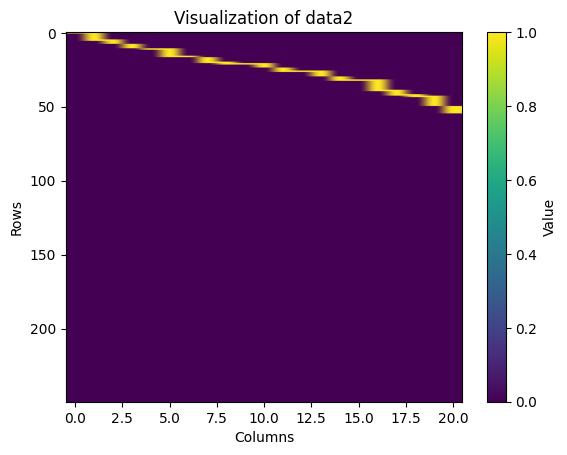

In [13]:
import matplotlib.pyplot as plt

plt.imshow(duration_matrix, aspect='auto', cmap='viridis')
plt.colorbar(label='Value')
plt.title('Visualization of data2')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [14]:
import numpy as np
import torch
import matplotlib.pyplot as plt


name = 'chem_00_7RrOhe6SSj0-003'
path = '/home/chengxin/chengxin/vasflow/log/2025_07_13-02_54_41-dp_tts_Lattn/val/video/epoch_0000_global_step_0.00e+00'


data0  = np.load(f'{path}/{name}_attn.npy')
data0 = torch.from_numpy(data0).float()


# data1  = np.load(f'{path}/{name}.npy')
# data1 = torch.from_numpy(data1).float()


data2  = np.load(f'/home/chengxin/chengxin/Dataset_Sound/Chem/preprocessed_data/duration_matrix_25/{name}.npy')
data2 = torch.from_numpy(data2).float()

# length = 250
# data1 = torch.nn.functional.pad(data1, (0, 0, 0, length - data1.shape[0]), mode='constant', value=0)
data0.shape, data2.shape, data0.sum(), data2.sum(), (data0 - data2).sum()

(torch.Size([250, 21]),
 torch.Size([250, 21]),
 tensor(50.),
 tensor(62.),
 tensor(-12.0000))

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt


name = '6331559613336179781_27420_00004'
mask = '_mask'
path = '/home/chengxin/chengxin/vasflow/log/2025_07_13-03_48_53-dp_tts_Lattn/val/video/epoch_0319_global_step_1.31e+05'


data0  = np.load(f'{path}/{name}{mask}_attn.npy')
data0 = torch.from_numpy(data0).float()



data2  = np.load(f'/home/chengxin/chengxin/Dataset_Sound/LRS2/preprocessed_data/duration_matrix_25/{name}.npy')
data2 = torch.from_numpy(data2).float()

# length = 250
# data1 = torch.nn.functional.pad(data1, (0, 0, 0, length - data1.shape[0]), mode='constant', value=0)
data0.shape, data2.shape, data0.sum(), data2.sum()

(torch.Size([250, 25]), torch.Size([250, 25]), tensor(44.), tensor(64.))

In [2]:
def maxPathSumWithPath(matrix):
    m, n = len(matrix), len(matrix[0])
    dp = [[float('-inf')] * n for _ in range(m)]
    prev = [[None] * n for _ in range(m)]  # 记录前驱方向
    
    # 初始化起点
    dp[0][0] = matrix[0][0]
    
    # 初始化第一行
    for j in range(1, n):
        dp[0][j] = dp[0][j-1] + matrix[0][j]
        prev[0][j] = 'left'
    
    # 初始化第一列
    for i in range(1, m):
        dp[i][0] = dp[i-1][0] + matrix[i][0]
        prev[i][0] = 'up'
    
    # 填充 dp 数组并记录前驱
    for i in range(1, m):
        for j in range(1, n):
            max_val = float('-inf')
            direction = None
            
            # 检查上方
            if i > 0 and dp[i-1][j] > max_val:
                max_val = dp[i-1][j]
                direction = 'up'
            
            # 检查左方
            if j > 0 and dp[i][j-1] > max_val:
                max_val = dp[i][j-1]
                direction = 'left'
            
            # 检查左上方
            if i > 0 and j > 0 and dp[i-1][j-1] > max_val:
                max_val = dp[i-1][j-1]
                direction = 'diag'
            
            dp[i][j] = max_val + matrix[i][j]
            prev[i][j] = direction
    
    # 回溯路径
    path = []
    i, j = m-1, n-1
    while i >= 0 and j >= 0:
        path.append((i, j))
        if prev[i][j] == 'up':
            i -= 1
        elif prev[i][j] == 'left':
            j -= 1
        elif prev[i][j] == 'diag':
            i -= 1
            j -= 1
        else:
            break  # 到达起点 (0,0)
    
    path.reverse()  # 反转得到从 (0,0) 到 (m-1,n-1) 的路径
    return dp[m-1][n-1], path



import copy
data000 = copy.deepcopy(data0)
data000[data000 < 0.1] = 0
data000

tensor([[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9999, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [3]:
# data000[data000 < 0.01] = 0
max_sum, path = maxPathSumWithPath(data000-1)
print(f"最大路径和: {max_sum}")
print(f"路径: {path}")
data000 = torch.zeros_like(data0)
for p in path:
    data000[p[0], p[1]] = 1




def findFirstZero(tensor):
    zero_mask = (tensor == 0)  # 找到所有 0 的位置
    indices = torch.nonzero(zero_mask, as_tuple=False)  # 获取 0 的坐标
    return indices[0].item() if indices.numel() > 0 else -1
data000[findFirstZero(data2.sum(-1)):] = 0

最大路径和: -214.80763244628906
路径: [(0, 0), (1, 0), (2, 1), (3, 1), (4, 1), (5, 2), (6, 3), (7, 4), (8, 4), (9, 5), (10, 6), (11, 7), (12, 8), (13, 8), (14, 8), (15, 9), (16, 10), (17, 10), (18, 11), (19, 12), (20, 12), (21, 12), (22, 13), (23, 14), (24, 15), (25, 16), (26, 17), (27, 17), (28, 18), (29, 19), (30, 19), (31, 20), (32, 20), (33, 20), (34, 21), (35, 21), (36, 21), (37, 22), (38, 22), (39, 22), (40, 23), (41, 23), (42, 24), (43, 24), (44, 24), (45, 24), (46, 24), (47, 24), (48, 24), (49, 24), (50, 24), (51, 24), (52, 24), (53, 24), (54, 24), (55, 24), (56, 24), (57, 24), (58, 24), (59, 24), (60, 24), (61, 24), (62, 24), (63, 24), (64, 24), (65, 24), (66, 24), (67, 24), (68, 24), (69, 24), (70, 24), (71, 24), (72, 24), (73, 24), (74, 24), (75, 24), (76, 24), (77, 24), (78, 24), (79, 24), (80, 24), (81, 24), (82, 24), (83, 24), (84, 24), (85, 24), (86, 24), (87, 24), (88, 24), (89, 24), (90, 24), (91, 24), (92, 24), (93, 24), (94, 24), (95, 24), (96, 24), (97, 24), (98, 24), (99,

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

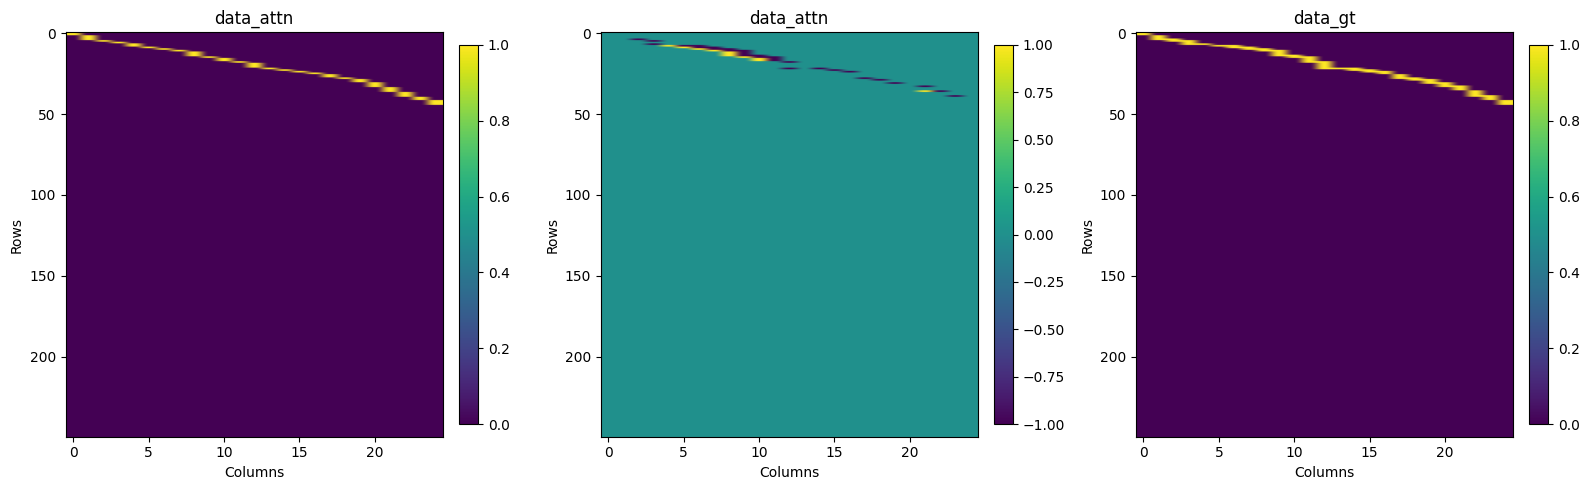

tensor(41.)


In [5]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

axs[0].imshow(data000, aspect='auto', cmap='viridis')
axs[0].set_title('data_attn')
axs[0].set_xlabel('Columns')
axs[0].set_ylabel('Rows')
plt.colorbar(axs[0].images[0], ax=axs[0], fraction=0.046, pad=0.04)

axs[1].imshow(data000-data2, aspect='auto', cmap='viridis')
axs[1].set_title('data_attn')
axs[1].set_xlabel('Columns')
axs[1].set_ylabel('Rows')
plt.colorbar(axs[1].images[0], ax=axs[1], fraction=0.046, pad=0.04)


axs[2].imshow(data2, aspect='auto', cmap='viridis')
axs[2].set_title('data_gt')
axs[2].set_xlabel('Columns')
axs[2].set_ylabel('Rows')
plt.colorbar(axs[2].images[0], ax=axs[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

print((data000-data2).abs().sum())